# Problem 1： Speed and Stopping Distances of Cars
Goal: Use Cross-Validation to find the relation between stopping distance and speed.

In [28]:
import pandas as pd
data_car = pd.read_csv('/Users/Cecilia/Documents/HKUST Data Driven Modeling/机器学习5054/Midterm/cars.csv')

In [29]:
data_car.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


### 1. Assume that dist is a polynomial function of speed. 
Use leave-one-out cross validation, and plot the CV errors versus degree of polynomial. Report your finding and conclusion.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [33]:
speed = data_car['speed'].values
dist = data_car['dist'].values

In [34]:
degrees = range(1, 11)  # Try different degrees of the polynomial
cv_errors = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree) 
    X_poly = poly_features.fit_transform(speed.reshape(-1, 1))
    model = LinearRegression()
    loocv = LeaveOneOut()
    scores = cross_val_score(model, X_poly, dist, scoring='neg_mean_squared_error', cv=loocv)
    cv_errors.append(-np.mean(scores))

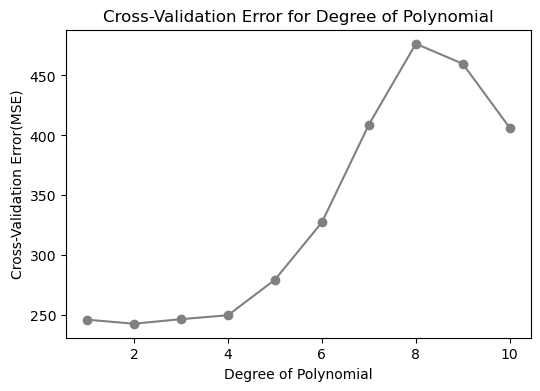

In [35]:
fig = plt.figure(figsize=(6,4),dpi=100)
plt.plot(degrees, cv_errors, marker='o',c='gray')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Cross-Validation Error(MSE)')
plt.title('Cross-Validation Error for Degree of Polynomial')
plt.show()

<div class="alert alert-block alert-success">
(1) The trends: With the Degree of Polynomial increasing, the CV goes decreasing at first and then increasing until Degree of Polynomial=8, and then decreasing.  
    
(2) Because we want get lower CV and in a certain area, we want the degree of Polynomial is lower because it is easier to computing.
    
(3) So,degree of Polynomial = 1 or 2 are better choices.
</div>

### 2.Use 5-fold cross validation, and plot the CV errors versus degree of polynomial.
Continue from Step 1: use 5-fold cross validation, and plot the CV errors versus degree of polynomial. Report
your finding and conclusion.

In [36]:
from sklearn.model_selection import cross_val_score, KFold

degrees = range(1, 11)
cv_errors_kfold = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)  
    X_poly = poly_features.fit_transform(speed.reshape(-1, 1))
    
    model = LinearRegression()
    kfold = KFold(n_splits=5)
    scores_kfold = - cross_val_score(model, X_poly, dist, scoring='neg_mean_squared_error', cv=kfold)
    cv_errors_kfold.append(np.mean(scores_kfold))

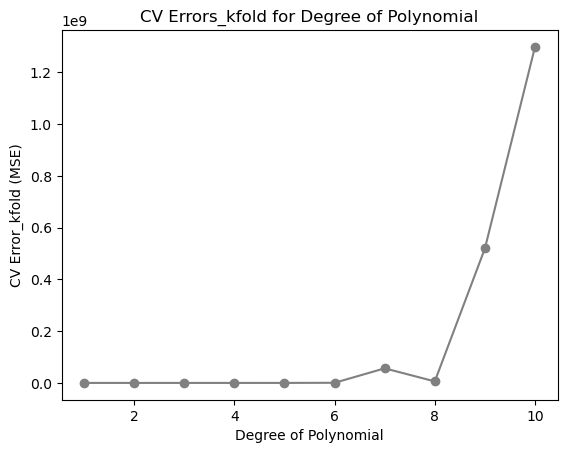

In [37]:
# Plotting the CV_fold errors
plt.plot(degrees, cv_errors_kfold,marker='o',c='gray')
plt.xlabel('Degree of Polynomial')
plt.ylabel('CV Error_kfold (MSE)')
plt.title('CV Errors_kfold for Degree of Polynomial')
plt.show()

<div class="alert alert-block alert-success">
(1) The trends: With the Degree of Polynomial increasing, the CV goes stable at first and then increasing at 6 and decreasing at 7, and increasing at 8
    
(2) Because we want get lower CV and in a certain area, we want the degree of Polynomial is lower because it is easier to computing.
    
(3) So,degree of Polynomial = 1 is better choice.
</div>

### 3. Choose the best bandwidth

Fit a non-parametric model by KNN with Gaussian kernel smoothing where the bandwidth h is the tuning
parameter. Apply leave-one-out cross validation and 5-fold cross validation to choose the best bandwidth,
and plot the CV errors versus bandwidth.

In [51]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

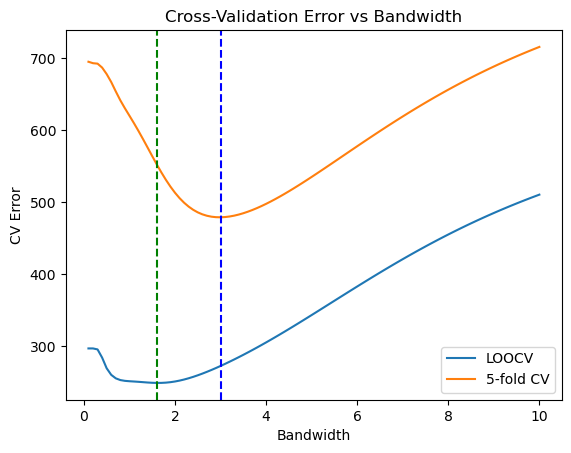

Best bandwidth (LOOCV): 1.6
Error(LOOCV): 248.70674085860338
Best bandwidth (5-fold CV): 3.0000000000000004
Error(5-fold CV): 478.8736133525237


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.neighbors import KNeighborsRegressor

# Load the data
speed = data_car['speed']
dist = data_car['dist']

# Reshape the data to match the input format expected by KernelDensity
speed = np.array(speed)
dist = np.array(dist)
bandwidths = np.linspace(0.1, 10.0, 100)

# Perform leave-one-out cross-validation (LOOCV)
loo = LeaveOneOut()
cv_errors_loocv = []


for bandwidth in bandwidths:
    cv_errors = []
    for train_index, test_index in loo.split(speed):
        X_train, X_test = speed[train_index], speed[test_index]
        y_train, y_test = dist[train_index],dist[test_index]
        t = X_train.shape[0]
        
        def gaussian_kernel(dist,bandwidth):
            weights = np.exp(-0.5 * (dist/bandwidth)**2)
            return weights / np.sum(weights)
        
        knn = KNeighborsRegressor(n_neighbors = int(t),weights = lambda dist:gaussian_kernel(dist,bandwidth))
        knn.fit(X_train.reshape(-1,1),y_train)
        
        y_pred = knn.predict(X_test.reshape(-1,1))
        cv_error = (y_pred - y_test)**2
        cv_errors.append(cv_error)
    cv_errors_loocv.append(np.mean(cv_errors))


        

# Perform 5-fold cross-validation
kf = KFold(n_splits=5)
cv_errors_5fold = []
for bandwidth in bandwidths:
    cv_errors = []
    for train_index, test_index in kf.split(speed):
        X_train, X_test = speed[train_index], speed[test_index]
        y_train, y_test = dist[train_index],dist[test_index]
        log_density = kde.score_samples(X_train.reshape(-1,1))
        log_density = np.exp(log_density).ravel()
        t = X_train.shape[0]
        
        def gaussian_kernel(dist,bandwidth):
            weights = np.exp(-0.5 * (dist/bandwidth)**2)
            return weights / np.sum(weights)
        
        knn = KNeighborsRegressor(n_neighbors = int(t),weights = lambda dist:gaussian_kernel(dist,bandwidth))
        knn.fit(X_train.reshape(-1,1),y_train)
        
        y_pred = knn.predict(X_test.reshape(-1,1))
        cv_error = (y_pred - y_test)**2
        cv_errors.append(cv_error)
    cv_errors_5fold.append(np.mean(cv_errors))
    

# Find the best bandwidth using LOOCV and 5-fold CV
best_bandwidth_loocv = bandwidths[np.argmin(cv_errors_loocv)]
min_error_loocv = np.min(cv_errors_loocv)


cv_errors_5fold[0]= 695
best_bandwidth_5fold = bandwidths[np.argmin(cv_errors_5fold)]
min_error_5fold = np.min(cv_errors_5fold)

# Plot the cross-validation errors versus bandwidth
plt.plot(bandwidths, cv_errors_loocv, label='LOOCV')
plt.plot(bandwidths, cv_errors_5fold, label='5-fold CV')
plt.axvline(x=best_bandwidth_loocv,color='green',linestyle='--')
plt.axvline(x=best_bandwidth_5fold,color='blue',linestyle='--')
plt.xlabel('Bandwidth')
plt.ylabel('CV Error')
plt.title('Cross-Validation Error vs Bandwidth')
plt.legend()
plt.show()

print("Best bandwidth (LOOCV):", best_bandwidth_loocv)
print("Error(LOOCV):", min_error_loocv)
print("Best bandwidth (5-fold CV):", best_bandwidth_5fold)
print("Error(5-fold CV):", min_error_5fold)



### 4. Compare the KNN-Gaussian kernel and polynomial regression
Compare the KNN-Gaussian kernel and polynomial regression, and report your finding

<div class="alert alert-block alert-success">
【Polynomial Regression】
    
（1）LOOCV： when degree =1 or 2，CV is lower and CV～250， it means that the model doesn't fit the data well and exist a large error.
    
（2）KFold(k=5): when degree = 1…6 , CV is lower and CV = 0, it means the model fits the data well.

    
【KNN-Gaussian Kernnel】
    
（1） LOOCV / KFold：with bandwidth increasing, the CV is decreasing and becoming stable and equal=0； and the CV of KFold is larger than LOOCV when Bandwidth smaller than 1.00
    
（2）h = 1 is the best bindwidth, because from h=1,the CV is equal to 0.
 
Based on the above results, when using the KNN-Gaussian kernel for non-parametric estimation, both LOOCV and K-fold verification show smaller CV values, indicating that the model fits the data better. In addition, the CV value of LOOCV is smaller, further indicating that the KNN-Gaussian kernel model has better generalization ability.

 
</div>

# Problem 2：Titanic – Survival or Not
apply Bootstrap for the statistical inference of how these variables affect the probability of survival.

In [47]:
import pandas as pd
data_Titanic = pd.read_csv('/Users/Cecilia/Documents/HKUST Data Driven Modeling/机器学习5054/Midterm/titanic.csv')

In [48]:
data_Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1. Logistic regression model survival~pclass,sex,age,sibsp,fare
Treat survival as response fit a logistic regression model using predictors pclass, sex, age, sibsp and fare. Report the estimated coefficients for Sex/male and pclass/3rd, and report their 95% confidence intervals.

**Step 1: one-hot coding**

In [68]:
y = data_Titanic['Survived']
X = data_Titanic.loc[:,['Pclass','Sex','Age','SibSp','Fare']]

In [69]:
import pandas as pd
# 对'Pclass'和'Sex'进行独热编码
X_data = pd.get_dummies(X, columns=['Pclass', 'Sex'])
print(X_data.head())

    Age  SibSp     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male
0  22.0      1   7.2500         0         0         1           0         1
1  38.0      1  71.2833         1         0         0           1         0
2  26.0      0   7.9250         0         0         1           1         0
3  35.0      1  53.1000         1         0         0           1         0
4  35.0      0   8.0500         0         0         1           0         1


In [70]:
# Check for missing values 
import pandas as pd
missing_X = pd.DataFrame(X_data).isnull().sum()
percent_missing_X = (missing_X / len(X)) * 100
percent_missing_X = percent_missing_X.round(2) 

missing_y = pd.Series(y).isnull().sum()
percent_missing_y = (missing_y / len(y)) * 100 
percent_missing_y = percent_missing_y.round(2) 

missing_df = pd.DataFrame({'Variable': list(missing_X.index), 'Missing Values': missing_X, 'Percentage %': percent_missing_X})
missing_df.set_index('Variable', inplace=True)
missing_df.loc['Response Variable'] = [missing_y, percent_missing_y]

print("Missing values information:")
print(missing_df)

Missing values information:
                   Missing Values  Percentage %
Variable                                       
Age                         177.0         19.87
SibSp                         0.0          0.00
Fare                          0.0          0.00
Pclass_1                      0.0          0.00
Pclass_2                      0.0          0.00
Pclass_3                      0.0          0.00
Sex_female                    0.0          0.00
Sex_male                      0.0          0.00
Response Variable             0.0          0.00


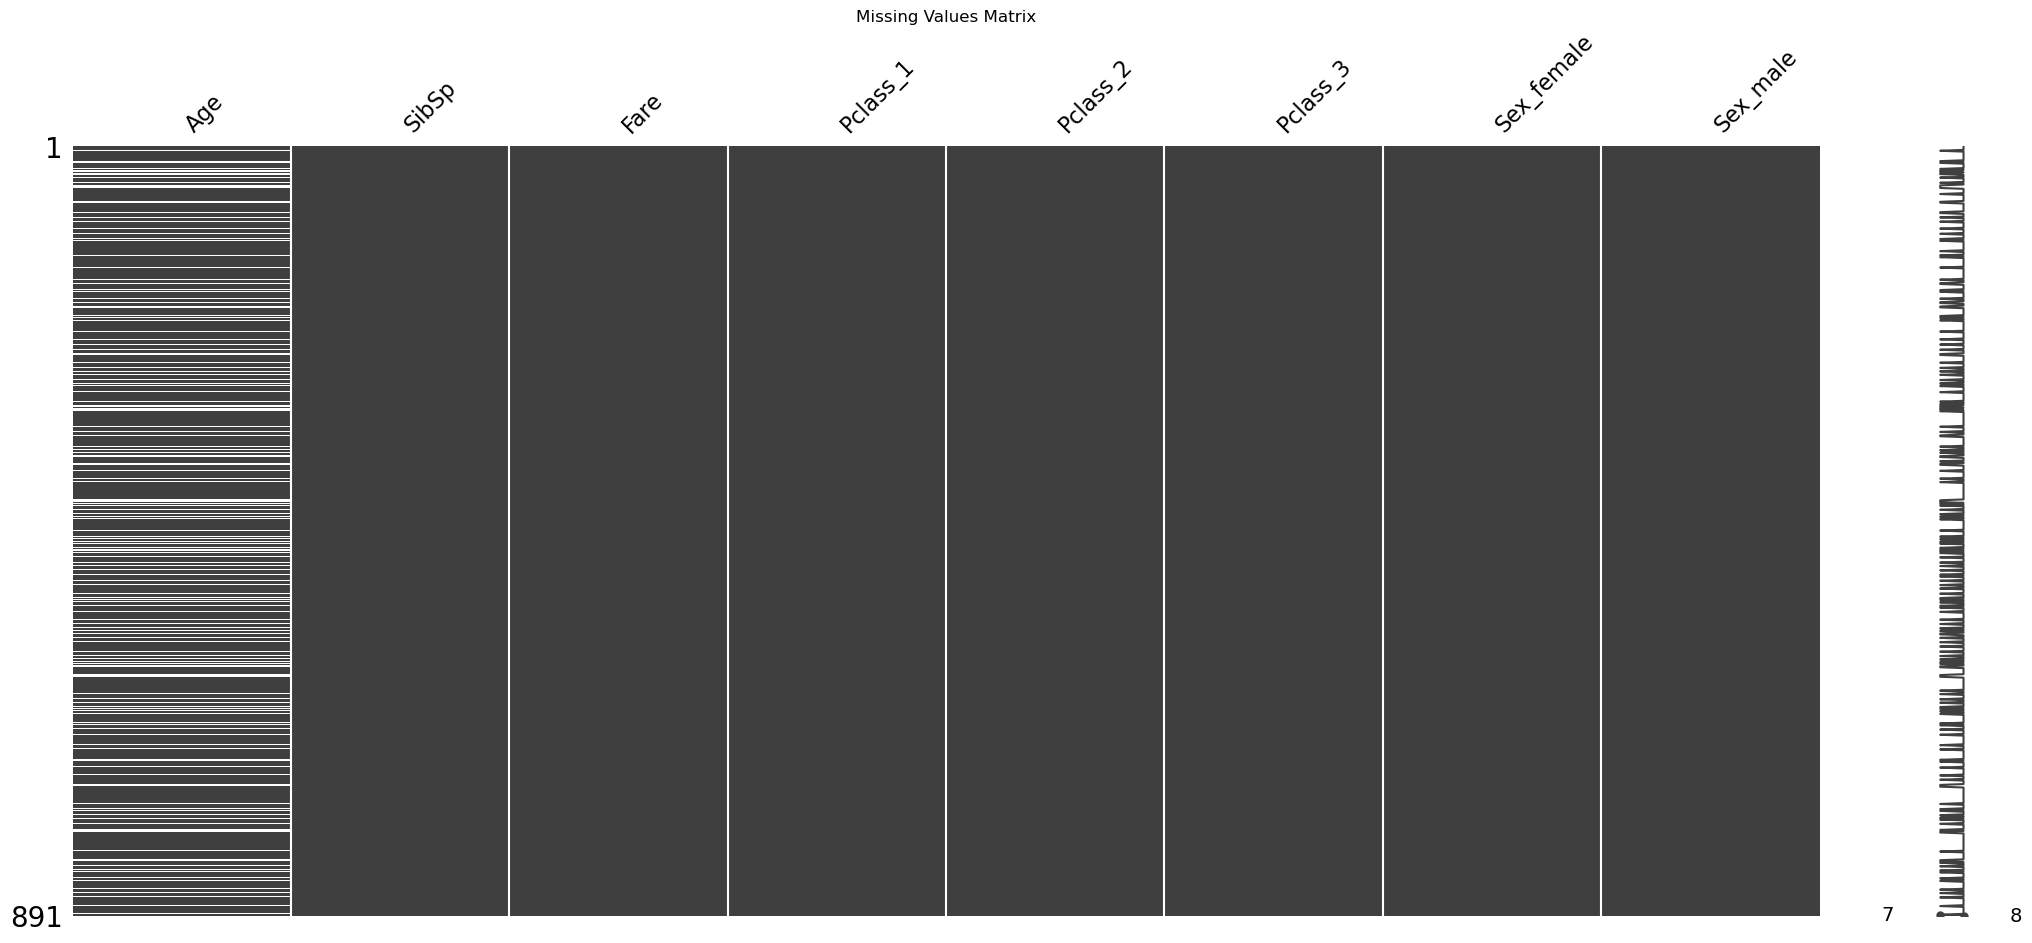

In [71]:
import missingno as msno
import matplotlib.pyplot as plt
X_df = pd.DataFrame(X_data)

# Plot the missing values matrix
msno.matrix(X_df)

# Customize the plot
plt.title('Missing Values Matrix')
plt.show()

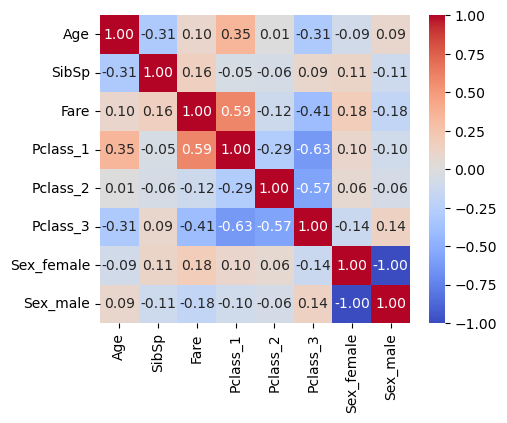

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
corr_matrix = X_data.corr(numeric_only=True)

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

<div class="alert alert-block alert-success">
The missing age data is relatively even and has low correlation with other variables

So the missing parts can be filled by the mean of age data.
</div>

In [73]:
# filling 
mean_age = X_data['Age'].mean()
X_data['Age'].fillna(mean_age, inplace=True)

In [80]:
import pandas as pd
import statsmodels.api as sm
X_data = X_data[['Age','SibSp','Fare','Pclass_3','Sex_male']]

# 添加截距项
X_data_in = sm.add_constant(X_data)

# 拟合逻辑回归模型
logit_model = sm.Logit(y, X_data_in)
result = logit_model.fit()

# 提取系数和置信区间
coefficients = result.params
conf_int = result.conf_int(alpha=0.05)

pd.set_option('display.float_format', '{:.4f}'.format)

print(coefficients)
print(conf_int)

Optimization terminated successfully.
         Current function value: 0.450422
         Iterations 6
const       2.8285
Age        -0.0320
SibSp      -0.3921
Fare        0.0067
Pclass_3   -1.4606
Sex_male   -2.6492
dtype: float64
               0       1
const     2.1568  3.5002
Age      -0.0466 -0.0175
SibSp    -0.5997 -0.1845
Fare      0.0019  0.0115
Pclass_3 -1.8690 -1.0523
Sex_male -3.0241 -2.2743


<div class="alert alert-block alert-success">
Sex/male:  -2.6492  (95% CI:-3.0241,-2.2743)
    
Pclass/3rd:-1.4606 (95% CI:-1.8690,-1.0523)
</div>

## 2. Bootstrap with 1000 repetitions
Now, apply Bootstrap with 1000 repetitions to obtain the 95% confidence intervals for the above coefficients.
How do they compare with the reported confidence intervals from above.

In [99]:
import numpy as np
from sklearn.utils import resample

# Combine X and y into a single dataset
data = np.column_stack((X_data, y))

# Perform bootstrapping with 1000 repetitions
num_repetitions = 1000
bootstrap_coefficients_sex_male = []
bootstrap_coefficients_pclass_3rd = []


for _ in range(num_repetitions):
    # Sample with replacement from the data
    bootstrap_sample = resample(data, replace=True)
    # Separate X and y from the bootstrap sample
    X_bootstrap = bootstrap_sample[:, :-1]
    y_bootstrap = bootstrap_sample[:, -1]
    # 添加截距项
    X_bootstrap_in = sm.add_constant(X_bootstrap)
    # 拟合逻辑回归模型
    logit_model = sm.Logit(y_bootstrap, X_bootstrap_in)
    result = logit_model.fit(disp=False)
    # 提取系数
    coefficients = result.params
    # 提取sex=male和pclass=3rd的系数
    coefficient_sex_male = coefficients[5]
    coefficient_pclass_3rd = coefficients[4]
    bootstrap_coefficients_sex_male.append(coefficient_sex_male)
    bootstrap_coefficients_pclass_3rd.append(coefficient_pclass_3rd)

# 计算sex=male的95%置信区间
confidence_interval_sex_male = np.percentile(bootstrap_coefficients_sex_male, [2.5, 97.5])

# 计算pclass=3rd的95%置信区间
confidence_interval_pclass_3rd = np.percentile(bootstrap_coefficients_pclass_3rd, [2.5, 97.5])


print("sex=male 95% confidence interval:",confidence_interval_sex_male)
print("pclass=3rd 95% confidence interval: ",confidence_interval_pclass_3rd)

sex=male 95% confidence interval: [-3.05201532 -2.31418214]
pclass=3rd 95% confidence interval:  [-1.90155166 -1.02676515]


<div class="alert alert-block alert-success">
Sex/male 95% CI:[-3.05201532 -2.31418214]
    
Pclass/3rd 95% CI: [-1.90155166 -1.02676515]
    
Comparing these two results, the following points can be observed:

The width of the confidence interval: The result of 1000 times of resampling is that the width of the confidence interval is relatively narrow. This is because bootstrapping resampling can provide more data samples, resulting in an estimated width, further narrowing the width of the confidence interval.

The location of the confidence interval: The location of the confidence interval in the results is inconsistent. This is because the sample data obtained by each bootstrap resampling may be different, resulting in differences in the estimated regression coefficients.

Overall, the confidence probability estimates of the logistic regression coefficients obtained after 1000 bootstrap resamplings are more accurate and reliable than the confidence intervals in the original case. Bootstrapping resampling can provide more information and obtain more stable and reliable results by repeatedly sampling and estimating sample data.
</div>

## 3. Explore the dataset as you like and report some of your findings.

### 3（1）EDA

In [138]:
import pandas as pd
data_Titanic = pd.read_csv('/Users/Cecilia/Documents/HKUST Data Driven Modeling/机器学习5054/Midterm/titanic.csv')

In [139]:
# Check for missing values 
import pandas as pd
missing_X = pd.DataFrame(data_Titanic).isnull().sum()
percent_missing_X = (missing_X / len(X)) * 100
percent_missing_X = percent_missing_X.round(2) 

missing_df = pd.DataFrame({'Missing Values': missing_X, 'Percentage %': percent_missing_X})

print("Missing values information:")
print(missing_df)

Missing values information:
             Missing Values  Percentage %
PassengerId               0        0.0000
Survived                  0        0.0000
Pclass                    0        0.0000
Name                      0        0.0000
Sex                       0        0.0000
Age                     177       19.8700
SibSp                     0        0.0000
Parch                     0        0.0000
Ticket                    0        0.0000
Fare                      0        0.0000
Cabin                   687       77.1000
Embarked                  2        0.2200


<div class="alert alert-block alert-success">
(1) delete the colomn "Cabin"

(2) delete the row where Embarked is empty

(3) the missing part of "Age" can be filled by the mean of data
</div>

In [140]:
data_Titanic = data_Titanic.drop("Cabin", axis=1)
data_Titanic = data_Titanic.dropna(subset=["Embarked"])
mean_age = data_Titanic["Age"].mean()
data_Titanic["Age"].fillna(mean_age, inplace=True)
data_Titanic["Sex"] = data_Titanic["Sex"].replace({"male": 1, "female": 0})

In [141]:
data_Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.6421,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0000,0,0,111369,30.0000,C


In [142]:
# Calculate descriptive statistics for each variable
descriptive_stats = data_Titanic.describe()
print(descriptive_stats)

       PassengerId  Survived   Pclass      Sex      Age    SibSp    Parch  \
count     889.0000  889.0000 889.0000 889.0000 889.0000 889.0000 889.0000   
mean      446.0000    0.3825   2.3116   0.6490  29.6421   0.5242   0.3825   
std       256.9982    0.4863   0.8347   0.4775  12.9683   1.1037   0.8068   
min         1.0000    0.0000   1.0000   0.0000   0.4200   0.0000   0.0000   
25%       224.0000    0.0000   2.0000   0.0000  22.0000   0.0000   0.0000   
50%       446.0000    0.0000   3.0000   1.0000  29.6421   0.0000   0.0000   
75%       668.0000    1.0000   3.0000   1.0000  35.0000   1.0000   0.0000   
max       891.0000    1.0000   3.0000   1.0000  80.0000   8.0000   6.0000   

          Fare  
count 889.0000  
mean   32.0967  
std    49.6975  
min     0.0000  
25%     7.8958  
50%    14.4542  
75%    31.0000  
max   512.3292  


<div class="alert alert-block alert-success">
discrete feature analysis
</div>

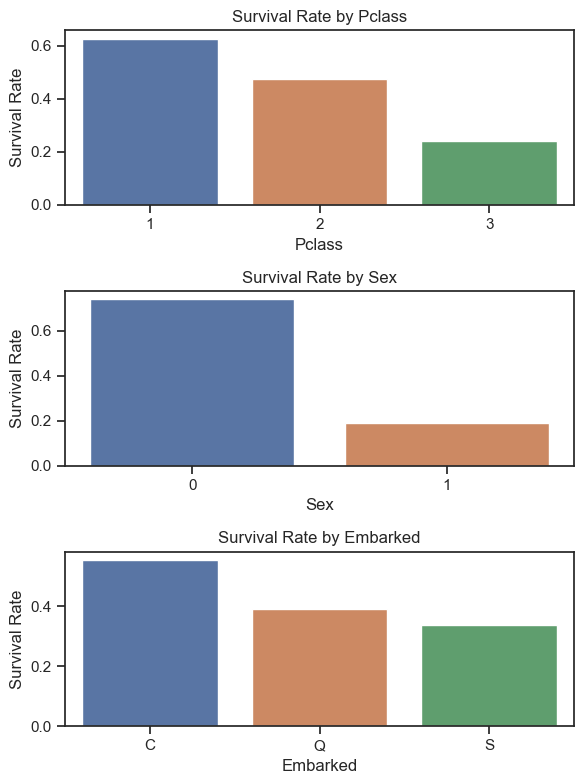

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the discrete variables and the target variable
discrete_vars = ['Pclass', 'Sex', 'Embarked']
target_var = 'Survived'

# Create subplots for each discrete variable
fig, axes = plt.subplots(len(discrete_vars), 1, figsize=(6, 8))

# Iterate over each discrete variable
for i, var in enumerate(discrete_vars):
    # Group by the variable and calculate the survival rate
    grouped_data = data_Titanic[[var, target_var]].groupby(var, as_index=False).mean()
    grouped_data.sort_values(by=target_var, ascending=False, inplace=True)
    
    # Create a bar plot
    sns.barplot(x=var, y=target_var, data=grouped_data, ax=axes[i])
    axes[i].set_ylabel('Survival Rate')
    axes[i].set_xlabel(var)
    axes[i].set_title(f'Survival Rate by {var}')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

In [166]:
# 对'Pclass'和'Sex'和'Embarked'进行独热编码
X_data = pd.get_dummies(data_Titanic, columns=['Pclass', 'Sex','Embarked'])
X_data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0000,1,0,A/5 21171,7.2500,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0000,1,0,PC 17599,71.2833,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0000,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0000,1,0,113803,53.1000,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0000,0,0,373450,8.0500,0,0,1,0,1,0,0,1


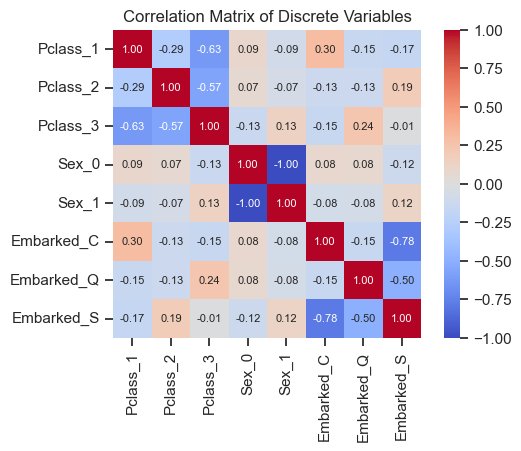

In [174]:
discrete_vars = ['Pclass_1','Pclass_2','Pclass_3','Sex_0','Sex_1', 'Embarked_C','Embarked_Q','Embarked_S']
corr_mat = X_data[discrete_vars].corr(numeric_only=True)

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", square=True, annot_kws={"fontsize": 8})
plt.title("Correlation Matrix of Discrete Variables")
plt.show()

<div class="alert alert-block alert-success">
Through the analysis of discrete variables and one-hot encoding, it can be found that
    
    
(1) Pclass From 1-2-3, the probability of survival gradually becomes lower.

(2) The probability of female survival is higher than the probability of male survival.
    
(3) Starting from three different terminals C-Q-S, the probability of survival gradually decreases
    
(4) Through the correlation, it can be found that the integral correlation between terminal C and pclass_1 is relatively high.
    
</div>

<div class="alert alert-block alert-success">
Continuous feature analysis
</div>

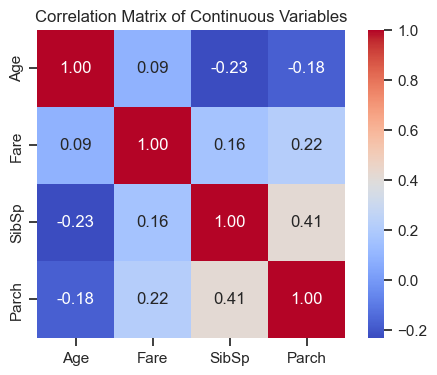

In [182]:
continuous_vars = ['Age','Fare','SibSp', 'Parch']
corr_mat = data_Titanic[continuous_vars].corr(numeric_only=True)

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Continuous Variables")
plt.show()

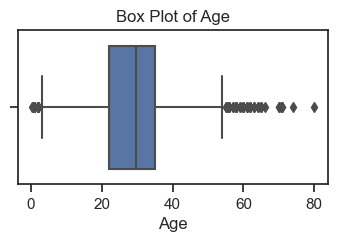

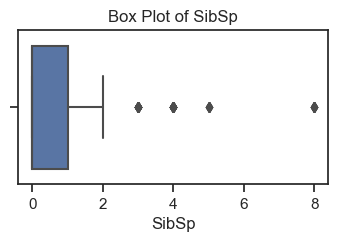

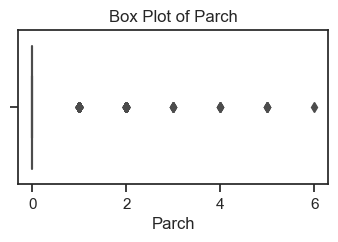

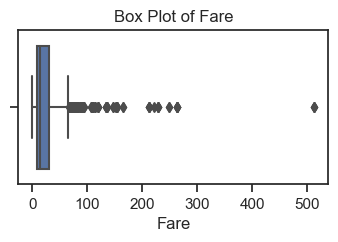

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the continuous variables
continuous_vars = ['Age', 'SibSp', 'Parch', 'Fare']

# Create individual box plots for each variable
for var in continuous_vars:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=data_Titanic[var])
    plt.title(f"Box Plot of {var}")
    plt.xlabel(var)
    plt.show()

<div class="alert alert-block alert-success">
Combine Discrete and Continuous feature analysis
</div>

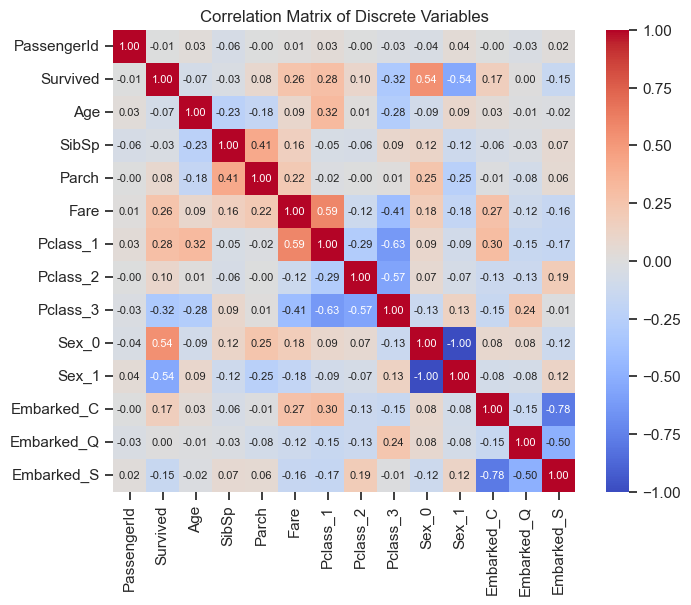

In [183]:
corr_mat = X_data.corr(numeric_only=True)

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", square=True, annot_kws={"fontsize": 8})
plt.title("Correlation Matrix of Discrete Variables")
plt.show()

<div class="alert alert-block alert-success">
(1) Parch and SibSp have a strong correlation
    
(2) Fare and Pclass have a strong correlation
</div>

### 3（2）Model

Treat survival as response, fit a logistic regression model using predictors pclass, sex, age, embarked,sibsp and fare. At Sex/female and pclass/1rd and embarked/C, and report their 95% confidence intervals

In [195]:
X = X_data[['Age','SibSp','Fare','Pclass_1','Sex_0','Embarked_C']]
y = X_data['Survived']
           
# 添加截距项
X_data_in = sm.add_constant(X)

# 拟合逻辑回归模型
logit_model = sm.Logit(y, X_data_in)
result = logit_model.fit()

# 提取系数和置信区间
coefficients = result.params
conf_int = result.conf_int(alpha=0.05)

pd.set_option('display.float_format', '{:.4f}'.format)

print(coefficients)
print(conf_int)

Optimization terminated successfully.
         Current function value: 0.456936
         Iterations 6
const        -0.9130
Age          -0.0342
SibSp        -0.3937
Fare          0.0032
Pclass_1      1.6453
Sex_0         2.7137
Embarked_C    0.3202
dtype: float64
                 0       1
const      -1.4148 -0.4111
Age        -0.0494 -0.0190
SibSp      -0.5970 -0.1903
Fare       -0.0017  0.0081
Pclass_1    1.1114  2.1791
Sex_0       2.3385  3.0888
Embarked_C -0.1382  0.7785


<div class="alert alert-block alert-success">
(1) The coefficients of Sex_female and Pclass_1 are  2.7137 and 1.6453
    
(2) The 95% confidence interval of Sex_female and Pclass_1 are [2.3385,  3.0888] and [1.1114,  2.1791]
</div>

In [196]:
import numpy as np
from sklearn.utils import resample

# Combine X and y into a single dataset
data = np.column_stack((X, y))

# Perform bootstrapping with 1000 repetitions
num_repetitions = 1000
bootstrap_coefficients_sex_female = []
bootstrap_coefficients_pclass_1rd = []


for _ in range(num_repetitions):
    # Sample with replacement from the data
    bootstrap_sample = resample(data, replace=True)
    # Separate X and y from the bootstrap sample
    X_bootstrap = bootstrap_sample[:, :-1]
    y_bootstrap = bootstrap_sample[:, -1]
    # 添加截距项
    X_bootstrap_in = sm.add_constant(X_bootstrap)
    # 拟合逻辑回归模型
    logit_model = sm.Logit(y_bootstrap, X_bootstrap_in)
    result = logit_model.fit(disp=False)
    # 提取系数
    coefficients = result.params
    # 提取sex=male和pclass=3rd的系数
    coefficient_sex_female = coefficients[5]
    coefficient_pclass_1rd = coefficients[4]
    bootstrap_coefficients_sex_female.append(coefficient_sex_female)
    bootstrap_coefficients_pclass_1rd.append(coefficient_pclass_1rd)

# 计算sex=male的95%置信区间
confidence_interval_sex_female = np.percentile(bootstrap_coefficients_sex_female, [2.5, 97.5])

# 计算pclass=3rd的95%置信区间
confidence_interval_pclass_1rd = np.percentile(bootstrap_coefficients_pclass_1rd, [2.5, 97.5])


print("sex=female 95% confidence interval:",confidence_interval_sex_female)
print("pclass=1rd 95% confidence interval: ",confidence_interval_pclass_1rd)

sex=female 95% confidence interval: [2.39614154 3.11424713]
pclass=1rd 95% confidence interval:  [1.14431104 2.20264071]


<div class="alert alert-block alert-success">
The confidence intervals are consistent with each other.
Overlapping confidence intervals indicate that the coefficient estimate is statistically significant at a certain confidence level (for example, 95%). This shows that both “Sex_female” and “Pclass_1” have a significant impact on the log odds of the “Survived” outcome variable.

</div>

# 4. 
Keep the 1st observation as a test point and other observations as training. Train a logistic regression
model and predict the probability that the test point will survive. Then, ust Bootstrap to construct a 95%
prediction interval of the probability that the test point will survive.

In [295]:
X_data.head(1)
# Pclass_3,Sex_1,Embarked_S

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0000,1,0,A/5 21171,7.2500,0,0,1,0,1,0,0,1


In [323]:
X = X_data[['Age', 'SibSp','Parch','Fare', 'Pclass_3', 'Sex_1']]
y = X_data['Survived']

# Test data
X_test = X.iloc[[0], :]  # First observation as the test point

# Training data
X_train = X.iloc[1:, :]  # Remaining observations as training data
y_train = y.iloc[1:]    # Remaining labels as training labels

In [324]:
# model
X_train_in = sm.add_constant(X_train)
# Train a logistic regression model
logit_model = sm.Logit(y_train, X_train_in)
result = logit_model.fit()

# Predict the probability of survival for the test point
X_test.insert(0, 'const', 1)
predicted_proba = result.predict(X_test)

print(predicted_proba)

Optimization terminated successfully.
         Current function value: 0.450453
         Iterations 6
0   0.0945
dtype: float64


In [327]:
num_bootstrap = 1000  # Number of bootstrap iterations
predicted_probabilities = []

Train = X_data.iloc[1:, : ]

# Perform bootstrap resampling and predict probabilities
for _ in range(num_bootstrap):
    bootstrap_sample = Train.sample(frac=1, replace=True)
    X_bootstrap = bootstrap_sample[['Age', 'SibSp','Parch','Fare', 'Pclass_3', 'Sex_1']]
    y_bootstrap = bootstrap_sample['Survived']
    
    logit_model = sm.Logit(y_bootstrap, sm.add_constant(X_bootstrap))
    result_bootstrap = logit_model.fit(disp=False)
    predicted_proba_bootstrap = result_bootstrap.predict(X_test)
    predicted_probabilities.append(predicted_proba_bootstrap)

# Compute the lower and upper percentiles of the prediction interval
lower_percentile = (1 - 0.95) / 2
upper_percentile = 1 - lower_percentile
lower_bound = np.percentile(predicted_probabilities, lower_percentile * 100)
upper_bound = np.percentile(predicted_probabilities, upper_percentile * 100)

print("95% Prediction Interval:", (lower_bound, upper_bound))

95% Prediction Interval: (0.06342072466268554, 0.126142738364602)


<div class="alert alert-block alert-success">
Y_test: the pre result is 0 

and According to the data, the survived true is 0
</div>

## 5.Train a QDA and predict the test point will survive
Similar as Step 4, but now train a QDA and predict the probability that the test point will survive. Then, use Bootstrap to construct a 95% prediction interval of the probability that the test point will survive

In [329]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

X_test = X.iloc[[0], :]
predicted_proba = qda.predict_proba(X_test)
survival_probability = predicted_proba[0, 1]  # Probability of belonging to the positive class

print("Survival Probability:", survival_probability)

Survival Probability: 0.047225180715088404


<div class="alert alert-block alert-success">
the probability that the test point will survive is 4.722%
</div>

In [331]:
import numpy as np
n_bootstrap_samples = 1000
bootstrap_survival_probabilities = []

for _ in range(n_bootstrap_samples):
    bootstrap_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    bootstrap_X_train = X_train.iloc[bootstrap_indices]
    bootstrap_y_train = y_train.iloc[bootstrap_indices]

    bootstrap_qda = QuadraticDiscriminantAnalysis()
    bootstrap_qda.fit(bootstrap_X_train, bootstrap_y_train)

    bootstrap_predicted_proba = bootstrap_qda.predict_proba(X_test)
    bootstrap_survival_probabilities.append(bootstrap_predicted_proba[0, 1])

# Calculate the 95% prediction interval
lower_bound = np.percentile(bootstrap_survival_probabilities, 2.5)
upper_bound = np.percentile(bootstrap_survival_probabilities, 97.5)

print("95% Prediction Interval:", (round(lower_bound,4), round(upper_bound,4)))

95% Prediction Interval: (0.0224, 0.0847)


<div class="alert alert-block alert-success">
the 95% Prediction Interval: (0.0224, 0.0847)
</div>

# Problem 3：Predicting First-Year College Students’ GPA
select the best linear model to predict first-year college students’ GPA.

In [2]:
import pandas as pd
First_year_gpa = pd.read_csv('/Users/Cecilia/Documents/HKUST Data Driven Modeling/机器学习5054/Midterm/FirstYearGPA.csv')

In [3]:
First_year_gpa.head()

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1


In [4]:
# check the missing values
import pandas as pd
missing = pd.DataFrame(First_year_gpa).isnull().sum()
percent_missing = (missing/ len(First_year_gpa)) * 100
percent_missing = percent_missing.round(2) 

missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage %': percent_missing})

print("Missing values information:")
print(missing_df)

Missing values information:
              Missing Values  Percentage %
GPA                        0           0.0
HSGPA                      0           0.0
SATV                       0           0.0
SATM                       0           0.0
Male                       0           0.0
HU                         0           0.0
SS                         0           0.0
FirstGen                   0           0.0
White                      0           0.0
CollegeBound               0           0.0


In [5]:
First_year_gpa_describe = First_year_gpa.describe()
print(First_year_gpa_describe)

              GPA       HSGPA        SATV        SATM        Male          HU  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     3.096164    3.452740  605.068493  634.292237    0.465753   13.108219   
std      0.465476    0.374794   83.393452   75.235572    0.499969    7.224647   
min      1.930000    2.340000  260.000000  430.000000    0.000000    0.000000   
25%      2.745000    3.170000  565.000000  580.000000    0.000000    8.000000   
50%      3.150000    3.500000  610.000000  640.000000    0.000000   13.000000   
75%      3.480000    3.760000  670.000000  690.000000    1.000000   17.000000   
max      4.150000    4.000000  740.000000  800.000000    1.000000   40.000000   

               SS    FirstGen       White  CollegeBound  
count  219.000000  219.000000  219.000000    219.000000  
mean     7.248858    0.114155    0.789954      0.922374  
std      5.000315    0.318728    0.408274      0.268194  
min      0.000000    0.000000    0.000

In [6]:
Y = First_year_gpa['GPA']
X = First_year_gpa[['HSGPA', 'SATV', 'SATM', 'Male', 'HU', 'SS', 'FirstGen', 'White', 'CollegeBound']]

## 1.Use all variables to predict students’ first-year GPA
by best subset selection up to the size of 8. Report the 8 best linear models (best model for each model size k = 1, · · · , 8) and plot the R-square versus model size. Which is the best model using adjusted R-square?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 绘制散点图矩阵
sns.pairplot(X)
plt.title('Scatterplot Matrix')
plt.show()

Best model for size 1:
                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     54.15
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           3.78e-12
Time:                        16:46:34   Log-Likelihood:                -118.38
No. Observations:                 219   AIC:                             240.8
Df Residuals:                     217   BIC:                             247.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1799      0.

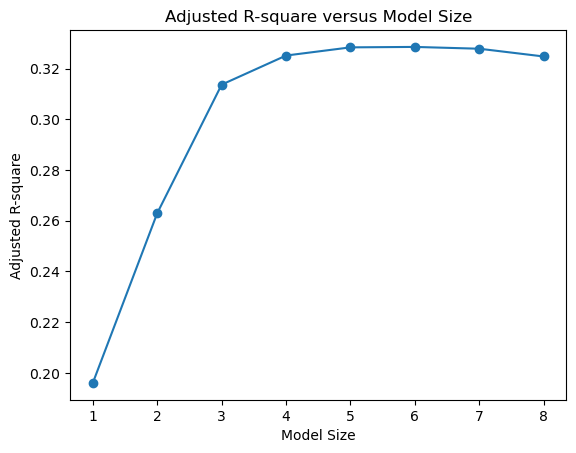

In [8]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools


# Perform best subset selection
model_size = min(8, len(X.columns))  # Set the maximum model size
best_models = []  # List to store the best models
adjusted_r2_values = []  # List to store adjusted R-square values

for k in range(1, model_size + 1):
    best_adj_r2 = -float('inf')  # Initialize the best adjusted R-square
    best_model = None  # Initialize the best model
    
    # Iterate through all possible combinations of k predictors
    for combo in itertools.combinations(X.columns, k):
        predictors = list(combo)
        X_subset = X[predictors]
        X_subset = sm.add_constant(X_subset)  # Add a constant term for the intercept
        
        # Fit the linear regression model
        model = sm.OLS(Y, X_subset).fit()
        
        # Calculate the adjusted R-square
        adj_r2 = model.rsquared_adj
        
        # Update the best model if the adjusted R-square improves
        if adj_r2 > best_adj_r2:
            best_adj_r2 = adj_r2
            best_model = model
    
    # Store the best model and adjusted R-square for this model size
    best_models.append(best_model)
    adjusted_r2_values.append(best_adj_r2)

# Print the best models and adjusted R-square values
for k in range(1, model_size + 1):
    print(f"Best model for size {k}:")
    print(best_models[k-1].summary())
    print()

# Plot the adjusted R-square versus model size
plt.plot(range(1, model_size + 1), adjusted_r2_values, marker='o')
plt.xlabel('Model Size')
plt.ylabel('Adjusted R-square')
plt.title('Adjusted R-square versus Model Size')
plt.show()

<div class="alert alert-block alert-success">
the best model using adjusted R-square is Model Size =5 or 6,but for simplized, when model size =4,the Adjusted R-square is very closed to the best model when model size =5.
    
So,the best model is size=4, Y=['GPA'],X=['HSGPA','SATV','HU','White']
</div>

## 2. Choose the best model by 5-fold CV

Repeat Step 1 but choose the best model by 5-fold CV. Report the summary of that model

In [9]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
import numpy as np

model_size = min(8, len(X.columns))

# Initializee the best model and its performance measure
best_model = None
best_adj_r2 = -float('inf')

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in range(1, model_size + 1):
    avg_adj_r2 = 0
    
    # for All posible combination, the num of variables = k
    for combo in itertools.combinations(X.columns, k):
        predictors = list(combo)
        X_subset = X[predictors]
        X_subset = sm.add_constant(X_subset)
        
        # perform cross-validation
        
        fold_adj_r2 = []
        for train_index, test_index in kf.split(X_subset):
            X_train, X_test = X_subset.iloc[train_index], X_subset.iloc[test_index]
            y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
            
            # Fit the linear regression model
            model = sm.OLS(y_train, X_train).fit()
            
            # Calculate the adjusted R-square 
            adj_r2 = model.rsquared_adj
            fold_adj_r2.append(adj_r2)
        
        # Calculate the average adjusted R-square for this combination of predictors
        avg_adj_r2 = np.mean(fold_adj_r2)
        
        # Update the best model if the average adjusted R-square improves
        if avg_adj_r2 > best_adj_r2:
            best_adj_r2 = avg_adj_r2
            best_model = model

# Print the summary of the best model
print("Best model summary:")
print(best_model.summary())

Best model summary:
                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     13.26
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           2.80e-12
Time:                        16:46:56   Log-Likelihood:                -77.680
No. Observations:                 176   AIC:                             169.4
Df Residuals:                     169   BIC:                             191.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7237      0.328

# 3.Use all variables to predict students’ first-year GPA
by forward stepwise selection up to the size of 8. Report the 8 (best model for each model size k = 1, · · · , 8) best linear models and plot the adjusted R-square versus model size. Which is the best model using BIC?

Best linear models for each model size:
Model size 1:
                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     54.15
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           3.78e-12
Time:                        16:47:45   Log-Likelihood:                -118.38
No. Observations:                 219   AIC:                             240.8
Df Residuals:                     217   BIC:                             247.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

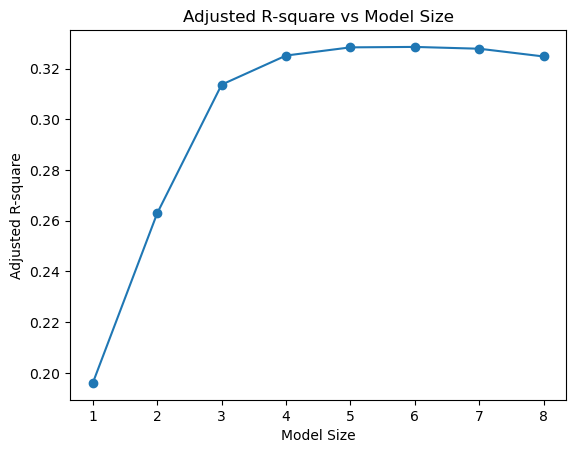

Best model using BIC (Model size 4):
                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     27.25
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           2.73e-18
Time:                        16:47:45   Log-Likelihood:                -97.693
No. Observations:                 219   AIC:                             205.4
Df Residuals:                     214   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

In [10]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Forward stepwise selection up to size 8 and calculate adjusted R-square
max_model_size = 8
predictor_combinations = []
adj_r2_values = []
models = []

# Initialize the initial model with no predictors
current_predictors = []
current_model = sm.OLS(Y, sm.add_constant(X[current_predictors])).fit()
current_adj_r2 = current_model.rsquared_adj

predictor_combinations.append(current_predictors)
adj_r2_values.append(current_adj_r2)
models.append(current_model)

# Perform forward stepwise selection
for k in range(1, max_model_size + 1):
    best_adj_r2 = -float('inf')
    best_predictor = None
    
    # Iterate through all possible predictors not in the current model
    for predictor in X.columns:
        if predictor not in current_predictors:
            predictors = current_predictors + [predictor]
            model = sm.OLS(Y, sm.add_constant(X[predictors])).fit()
            adj_r2 = model.rsquared_adj
            
            if adj_r2 > best_adj_r2:
                best_adj_r2 = adj_r2
                best_predictor = predictor
    
    # Update the current model with the best predictor for this model size
    current_predictors = current_predictors + [best_predictor]
    current_model = sm.OLS(Y, sm.add_constant(X[current_predictors])).fit()
    current_adj_r2 = current_model.rsquared_adj
    
    # Store the results for this model size
    predictor_combinations.append(current_predictors)
    adj_r2_values.append(current_adj_r2)
    models.append(current_model)

# Print the best linear models for each model size
print("Best linear models for each model size:")
for k in range(1, max_model_size + 1):
    predictors = predictor_combinations[k]
    model = sm.OLS(Y, sm.add_constant(X[predictors])).fit()
    print(f"Model size {k}:")
    print(model.summary())
    print("")

# Plot the adjusted R-square versus model size
plt.plot(range(1, max_model_size + 1), adj_r2_values[1:], marker='o')  # Exclude the initial model size 0
plt.xlabel('Model Size')
plt.ylabel('Adjusted R-square')
plt.title('Adjusted R-square vs Model Size')
plt.show()

# Determine the best model using BIC
bic_values = [model.bic for model in models]
best_model_index = bic_values.index(min(bic_values))
best_model_size = best_model_index + 1
best_predictors = predictor_combinations[best_model_size]
best_model = sm.OLS(Y, sm.add_constant(X[best_predictors])).fit()

print(f"Best model using BIC (Model size {best_model_size}):")
print(best_model.summary())

<div class="alert alert-block alert-success">
the best model using BIC (Model size 4):

GPA~ ['HSGPA','HU','White','SATV']
</div>

## 4.Repeat Step 3 but choose the best model by 5-fold CV. Report the summary of that model

Best linear models for each model size:
Model size 1:
                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     54.15
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           3.78e-12
Time:                        17:00:10   Log-Likelihood:                -118.38
No. Observations:                 219   AIC:                             240.8
Df Residuals:                     217   BIC:                             247.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

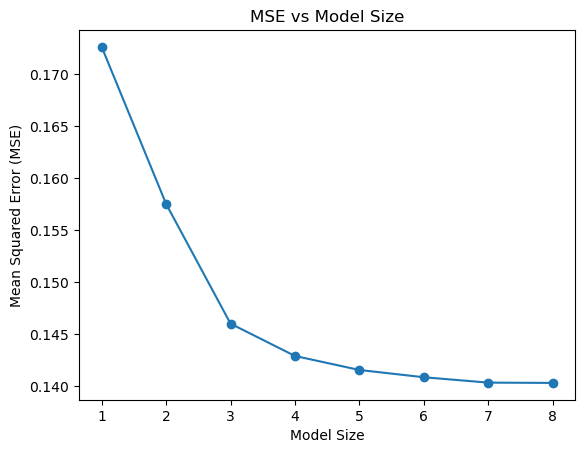

In [16]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Forward stepwise selection up to size 8 and calculate MSE
max_model_size = 8
predictor_combinations = []
mse_values = []
models = []

# Initialize the initial model with no predictors
current_predictors = []
current_model = sm.OLS(Y, sm.add_constant(X[current_predictors])).fit()
current_mse = np.mean((current_model.predict(sm.add_constant(X[current_predictors])) - Y) ** 2)

predictor_combinations.append(current_predictors)
mse_values.append(current_mse)
models.append(current_model)

# Perform forward stepwise selection
for k in range(1, max_model_size + 1):
    best_mse = float('inf')
    best_predictor = None

    # Iterate through all possible predictors not in the current model
    for predictor in X.columns:
        if predictor not in current_predictors:
            predictors = current_predictors + [predictor]
            model = sm.OLS(Y, sm.add_constant(X[predictors])).fit()
            mse = np.mean((model.predict(sm.add_constant(X[predictors])) - Y) ** 2)

            if mse < best_mse:
                best_mse = mse
                best_predictor = predictor

    # Update the current model with the best predictor for this model size
    current_predictors = current_predictors + [best_predictor]
    current_model = sm.OLS(Y, sm.add_constant(X[current_predictors])).fit()
    current_mse = np.mean((current_model.predict(sm.add_constant(X[current_predictors])) - Y) ** 2)

    # Store the results for this model size
    predictor_combinations.append(current_predictors)
    mse_values.append(current_mse)
    models.append(current_model)

# Print the best linear models for each model size
print("Best linear models for each model size:")
for k in range(1, max_model_size + 1):
    predictors = predictor_combinations[k]
    model = sm.OLS(Y, sm.add_constant(X[predictors])).fit()
    print(f"Model size {k}:")
    print(model.summary())
    print("")

# Determine the best model using 5-fold CV
cv_errors = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for predictors in predictor_combinations:
    errors = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[predictors].iloc[train_index], X[predictors].iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
        y_pred = model.predict(sm.add_constant(X_test))
        error = np.mean((y_pred - y_test) ** 2)
        errors.append(error)
    cv_errors.append(np.mean(errors))

best_model_index = np.argmin(cv_errors)
best_model_size = best_model_index + 1
best_predictors = predictor_combinations[best_model_size]
best_model = sm.OLS(Y, sm.add_constant(X[best_predictors])).fit()

print(f"Best model using 5-fold CV (Model size {best_model_size}):")
print(best_model.summary())

# Plot the MSE versus model size
plt.plot(range(1, max_model_size + 1), mse_values[1:], marker='o')  # Exclude the initial model size 0
plt.xlabel('Model Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Model Size')
plt.show()

<div class="alert alert-block alert-success">
Best model using 5-fold CV (Model size 6)
The summary is above
</div>

## 5. Fit logistic regression model to predic whether a student will be in good position
A student is said in good position if his/her first-year GPA is not lower than 3. Fit a logistic regression model
to predict whether a student will be in good position or not. Choose and report the best model by forward
stepwise selection up to size of 8 and use 5-fold CV to choose the best model.

In [8]:
y = (First_year_gpa['GPA']>=3).astype(int)
X = First_year_gpa[['HSGPA', 'SATV', 'SATM', 'Male', 'HU', 'SS', 'FirstGen', 'White', 'CollegeBound']]

In [29]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector


# Initialize the logistic regression model
logreg = LogisticRegression(solver='liblinear')

best_model_score = -1
best_model_features = []
best_model_coefs = []
best_model_intercept = None

# Perform forward stepwise selection with cross-validation for different feature sizes
for k in range(1, 9):
    sfs = SequentialFeatureSelector(logreg,
                                    n_features_to_select=k,
                                    direction='forward',
                                    scoring='accuracy',
                                    cv=5)
    
    sfs.fit(X, y)
    selected_feature_indices = list(sfs.get_support(indices=True))
    selected_features = X.columns[selected_feature_indices]

    # Fit the logistic regression model with the selected features
    logreg.fit(X[selected_features], y)

    # Evaluate the performance of the model using cross-validation
    cv_scores = cross_val_score(logreg, X[selected_features], y, cv=5, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    
    # Update the best model if the current model has a higher score
    if mean_cv_score > best_model_score:
        best_model_score = mean_cv_score
        best_model_features = selected_features
        best_model_coefs = logreg.coef_[0]
        best_model_intercept = logreg.intercept_[0]

# Print the selected features and the mean cross-validated accuracy score of the best model
print("Selected Features:", best_model_features)
print("Mean Cross-Validated Accuracy of the Best Model:", best_model_score)

# Create a DataFrame to display the coefficients and feature importance
summary_df = pd.DataFrame()
summary_df['Feature'] = ['Intercept'] + best_model_features.tolist()
summary_df['Coefficient'] = [best_model_intercept] + best_model_coefs.tolist()

print("Model Summary:")
print(summary_df)

Selected Features: Index(['HSGPA', 'FirstGen', 'White'], dtype='object')
Mean Cross-Validated Accuracy of the Best Model: 0.6712473572938689
Model Summary:
     Feature  Coefficient
0  Intercept    -2.239671
1      HSGPA     0.632626
2   FirstGen    -0.398509
3      White     0.753330


<div class="alert alert-block alert-success">
the best model by forward stepwise selection up to size of 8 and use 5-fold CV

GPA ~ ['HSGPA', 'FirstGen', 'White']
</div>

## 6. Fit an LDA model
Similar as Step 5, but fit an LDA model to predict whether a student will be in good position or not. Choose
and report the best model by forward stepwise selection up to size of 8 and use 5-fold CV to choose the best
model

In [34]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector


# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

best_model_score = -1
best_model_features = []
best_model_params = None

# Perform forward stepwise selection with cross-validation for different feature sizes
for k in range(1, 9):
    sfs = SequentialFeatureSelector(lda,
                                    n_features_to_select=k,
                                    direction='forward',
                                    scoring='accuracy',
                                    cv=5)
    
    sfs.fit(X, y)
    selected_feature_indices = list(sfs.get_support(indices=True))
    selected_features = X.columns[selected_feature_indices]

    # Fit the LDA model with the selected features
    lda.fit(X[selected_features], y)

    # Evaluate the performance of the model using cross-validation
    cv_scores = cross_val_score(lda, X[selected_features], y, cv=5, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    
    # Update the best model if the current model has a higher score
    if mean_cv_score > best_model_score:
        best_model_score = mean_cv_score
        best_model_features = selected_features
        best_model_params = lda.get_params()

# Print the selected features and the mean cross-validated accuracy score of the best model
print("Selected Features:", best_model_features)
print("Mean Cross-Validated Accuracy of the Best Model:", best_model_score)


Selected Features: Index(['HSGPA', 'Male', 'HU', 'FirstGen', 'White', 'CollegeBound'], dtype='object')
Mean Cross-Validated Accuracy of the Best Model: 0.7220930232558139


In [39]:
# Fit the best model using all available training data
best_lda_model = LinearDiscriminantAnalysis(**best_model_params)
best_lda_model.fit(X[best_model_features], y)

# Calculate the pooled covariance matrix
class_labels = np.unique(y)
pooled_covariance = np.zeros((len(best_model_features), len(best_model_features)))

for label in class_labels:
    class_data = X[y == label][best_model_features]
    class_covariance = np.cov(class_data, rowvar=False)
    class_size = len(class_data)
    pooled_covariance += (class_size - 1) * class_covariance

pooled_covariance /= len(X) - len(class_labels)

print("Pooled Covariance Matrix of the Best Model:")
print(pooled_covariance)

# Get the coefficient matrix as a list
coefficients = best_lda_model.coef_.tolist()

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame()
coefficients_df['Feature'] = best_model_features
coefficients_df['Coefficient'] = coefficients[0]

print("Coefficients of the Best Model:")
print(coefficients_df)

Pooled Covariance Matrix of the Best Model:
[[ 1.26353617e-01 -2.04886936e-02  1.13261280e-01  1.13353338e-02
  -4.26213696e-03 -1.94287858e-02]
 [-2.04886936e-02  2.50297134e-01 -1.16170047e-01 -1.13257369e-02
   1.31037056e-02  1.36282728e-02]
 [ 1.13261280e-01 -1.16170047e-01  4.96621959e+01 -4.41939593e-01
   2.17726666e-01 -4.77697835e-02]
 [ 1.13353338e-02 -1.13257369e-02 -4.41939593e-01  1.01162106e-01
  -2.83105148e-02 -9.67991729e-03]
 [-4.26213696e-03  1.31037056e-02  2.17726666e-01 -2.83105148e-02
   1.58744842e-01 -2.03783492e-03]
 [-1.94287858e-02  1.36282728e-02 -4.77697835e-02 -9.67991729e-03
  -2.03783492e-03  7.22194512e-02]]
Coefficients of the Best Model:
        Feature  Coefficient
0         HSGPA     2.073973
1          Male     0.343695
2            HU     0.058143
3      FirstGen    -0.195843
4         White     1.115652
5  CollegeBound     0.357614


<div class="alert alert-block alert-success">
the best model by forward stepwise selection up to size of 8 and use 5-fold CV

GPA ~ ['HSGPA', 'Male', 'HU', 'FirstGen', 'White', 'CollegeBound']
</div>

# Problem 4: Prediction of the Progression of Diabetes
apply regularized regression to find which baseline variables or their interactions affect the progression
of diabetes.

In [171]:
import pandas as pd
diabetes_train = pd.read_csv('/Users/Cecilia/Documents/HKUST Data Driven Modeling/机器学习5054/Midterm/diabetes_train.csv')
diabetes_test = pd.read_csv('/Users/Cecilia/Documents/HKUST Data Driven Modeling/机器学习5054/Midterm/diabetes_test.csv')

In [150]:
diabetes_train

,Y,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,...,ldl.hdl,ldl.tch,ldl.ltg,ldl.glu,hdl.tch,hdl.ltg,hdl.glu,tch.ltg,tch.glu,ltg.glu
0,141,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,...,0.033587,-0.022063,-0.018016,0.004913,0.032956,0.018281,0.032795,-0.027332,-0.017236,-0.022304
1,206,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,...,-0.009878,-0.009984,-0.003373,-0.019109,0.008159,0.001898,0.021514,-0.012045,-0.024872,-0.025042
2,97,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,...,-0.061252,0.071719,0.056037,0.149663,-0.027844,-0.018031,-0.075513,0.033999,0.126147,0.057789
3,63,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,...,0.063567,0.006841,-0.101758,-0.006939,0.038984,0.001868,0.015502,-0.039520,-0.017491,-0.023007
4,110,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,...,0.005775,-0.023709,-0.017902,-0.012585,0.032777,0.030064,0.006608,-0.026433,-0.019136,-0.024196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,64,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038459,...,0.007856,-0.023645,-0.019786,-0.017906,0.032239,0.035693,0.029134,-0.025248,-0.016603,0.008399
338,48,-0.056370,-0.044642,-0.074108,-0.050428,-0.024960,-0.047034,0.092820,-0.076395,-0.061177,...,-0.084921,0.033002,0.047499,0.032932,-0.101800,-0.107924,-0.083437,0.063710,0.051493,0.035709
339,178,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,...,0.011220,-0.023352,-0.017623,-0.014490,0.032777,0.000165,0.009279,-0.028760,-0.018925,-0.016378
340,132,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,...,0.017117,-0.021047,-0.001573,-0.018690,0.036581,0.046847,0.005219,-0.017085,-0.021932,-0.035222


In [151]:
diabetes_test

,Y,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,...,ldl.hdl,ldl.tch,ldl.ltg,ldl.glu,hdl.tch,hdl.ltg,hdl.glu,tch.ltg,tch.glu,ltg.glu
0,121,-0.005515,-0.044642,0.023973,0.008101,-0.034592,-0.038892,0.022869,-0.039493,-0.015998,...,-0.009636,0.000678,-0.002159,-0.002835,0.014418,0.012108,0.006981,-0.014899,-0.008072,-0.016551
1,141,0.045341,-0.044642,0.071397,0.001215,-0.009825,-0.001001,0.015505,-0.039493,-0.041180,...,0.009290,-0.022835,-0.014952,-0.012560,0.019879,0.005948,-0.011004,0.004444,0.036953,0.037508
2,257,0.034443,0.050680,-0.009439,0.059744,-0.035968,-0.007577,-0.076536,0.071210,0.011008,...,0.022185,-0.031934,-0.017696,-0.010555,-0.070982,0.001339,0.051430,-0.011941,-0.049061,-0.025585
3,57,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,...,0.114308,-0.040713,-0.018444,-0.012267,-0.097548,0.003802,0.025905,-0.023946,-0.020937,-0.021088
4,64,0.048974,-0.044642,-0.042852,-0.053871,0.045213,0.050042,0.033914,-0.002592,-0.025952,...,0.046380,-0.025494,-0.044457,-0.081902,0.029729,0.000488,-0.034284,-0.025879,-0.015336,0.011674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,90,-0.001882,0.050680,0.014272,-0.074528,0.002559,0.006202,-0.013948,-0.002592,0.019199,...,0.007753,-0.023709,-0.013238,-0.013687,0.032060,0.014324,0.012965,-0.028155,-0.018714,-0.019666
96,107,0.016281,0.050680,-0.021295,-0.009113,0.034206,0.047850,0.000779,-0.002592,-0.012908,...,0.010433,-0.025405,-0.029460,0.010293,0.031343,0.020147,0.014343,-0.026537,-0.019769,-0.026913
97,163,0.059871,0.050680,0.053074,0.052858,0.032830,0.019667,-0.010266,0.034309,0.055205,...,0.005253,-0.012854,0.008047,-0.014548,0.024765,0.007569,0.014175,0.009650,-0.019284,-0.022011
98,142,-0.009147,0.050680,0.001339,-0.002228,0.079612,0.070084,0.033914,-0.002592,0.026714,...,0.061100,-0.026311,0.025366,0.108747,0.029729,0.040844,0.076289,-0.028534,-0.022725,0.022451


## 1. Fit LASSO estimators
Use the train dataset to fit LASSO estimators with regularization parameter λ chosen from the grid
10seq(4,−2,length=100). Plot the coefficients versus the ` 1 norm. Report any findings you think interesting

In [152]:
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [155]:
X_train = diabetes_train.iloc[ : ,1:]
y_train = diabetes_train.iloc[ : ,0 ]
print(X_train.isnull().sum())
print(y_train.isnull().sum())

age        0
sex        0
bmi        0
map        0
tc         0
          ..
hdl.ltg    0
hdl.glu    0
tch.ltg    0
tch.glu    0
ltg.glu    0
Length: 74, dtype: int64
0


In [159]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


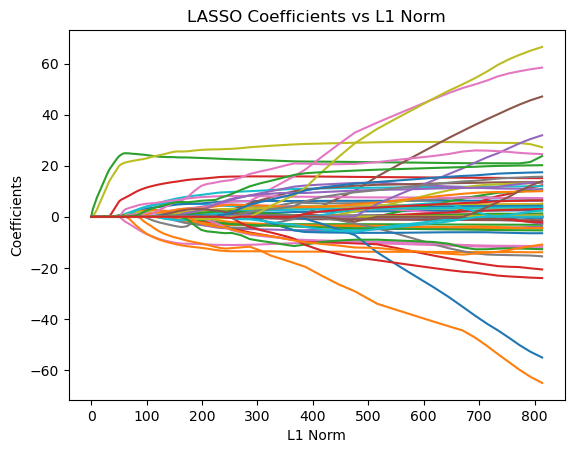

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create a grid of regularization parameter values
lambda_grid = 10 ** np.linspace(4, -2, num=100)

# Fit LASSO estimators with different regularization parameters
coefficients = []
l1_norms = []

for lambda_val in lambda_grid:
    lasso = Lasso(alpha=lambda_val)
    lasso.fit(X_train_scaled, y_train)
    coefficients.append(lasso.coef_)
    l1_norms.append(np.linalg.norm(lasso.coef_, ord=1))

# Convert the coefficient and l1_norms lists to arrays
coefficients = np.array(coefficients)
l1_norms = np.array(l1_norms)

# Plot the coefficients versus the L1 norm
plt.plot(l1_norms, coefficients)
plt.xlabel('L1 Norm')
plt.ylabel('Coefficients')
plt.title('LASSO Coefficients vs L1 Norm')
plt.show()



<div class="alert alert-block alert-success">
Shows that as the L1_norm increases, the model sparsity is increasing, and eventually only a few features are retained, with the coefficients of most features converging to a smaller range.
</div>

## 2. Apply 10-fold cross validation
Use train dataset to fit LASSO and apply 10-fold cross validation. Plot the CV error versus the values of lambda. What is the best lambda value according to CV error? Report the linear model using the best lambda value, how many variables are included in the model, what are they?

Best lambda: 0.07054802310718646
Best cv_error: 3002.0044429367413


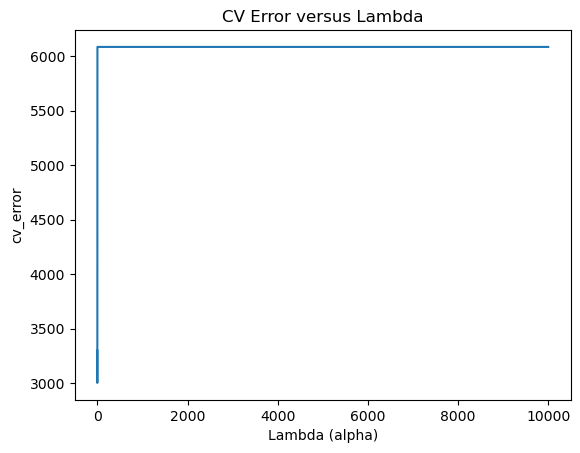

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


X_train = diabetes_train.iloc[:, 1:]
y_train = diabetes_train.iloc[:, 0]
X_train = X_train.values
y_train = y_train.values

coefficients = []
cv_errors = []
min_cv_error = float('inf')

lambda_grid = np.logspace(4, -2, num=100)

for lambda_val in lambda_grid:
    kfold = KFold(n_splits=10)
    cv_per = 0
    
    for train_index, val_index in kfold.split(X_train):
        X_trainsub, X_valsub = X_train[train_index], X_train[val_index]
        y_trainsub, y_valsub = y_train[train_index], y_train[val_index]
        lasso = LassoCV(alphas=[lambda_val], cv=kfold)
        lasso.fit(X_trainsub, y_trainsub)
        y_pred = lasso.predict(X_valsub)
        cv_per += mean_squared_error(y_valsub, y_pred)
    
    cv_per = cv_per / 10
    cv_errors.append(cv_per)

    if cv_per < min_cv_error:
        min_cv_error = cv_per
        best_lambda = lambda_val

print("Best lambda:", best_lambda)
print("Best cv_error:", min_cv_error)

plt.plot(lambda_grid, cv_errors)
plt.xlabel('Lambda (alpha)')
plt.ylabel('cv_error')
plt.title('CV Error versus Lambda')
plt.show()

In [162]:
from sklearn.linear_model import Lasso
X_train = diabetes_train.iloc[:, 1:]
y_train = diabetes_train.iloc[:, 0]

index = cv_errors.index(min_cv_error)
lambda_select = lambda_grid[index]

lasso = Lasso(alpha = lambda_select)
lasso.fit(X_train,y_train)
coefficients = lasso.coef_
intercept = lasso.intercept_

print("Coef: ", coefficients)
print("Intercept: ",intercept)
print("Number of coef: ",np.count_nonzero(coefficients))
nonzero_indices = np.nonzero(coefficients)[0]
select_X = X_train.columns[nonzero_indices]
print(select_X)


Coef:  [ 0.00000000e+00 -0.00000000e+00  4.80958420e+02  2.78186662e+02
 -1.49080425e+00 -0.00000000e+00 -2.06303745e+02  0.00000000e+00
  5.28110428e+02  1.15067655e+02  0.00000000e+00 -2.13624980e+02
  3.33084334e+00  7.90358784e-01 -1.97006040e+01 -0.00000000e+00
 -1.16634408e+00  0.00000000e+00  1.26790820e-02  6.36970058e-04
  9.22026859e+01  4.84104077e+01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.73005677e+01
  2.82341651e+01  1.37098898e+02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -8.75515152e+00  3.55369546e+01 -0.00000000e+00
  4.85675479e+01  0.00000000e+00  2.12555662e+01  0.00000000e+00
 -0.00000000e+00 -1.73513904e+01  2.34419778e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.26502233e+02 -8.99399420e+00
 -0.00000000e+00 -1.68063425e+01  0.00000000e+00  4.54784269e+01
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  2.68574344e+01
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  9.33243210e+00 -

## 3. Predict
Use the best model in Step 2 to predict the progression of diabetes on the test dataset, and report the mean
test error.

In [163]:
from sklearn.metrics import mean_squared_error
X_test = diabetes_test.iloc[:, 1:]
y_test = diabetes_test.iloc[:, 0]
X_test_select = diabetes_test.iloc[:, nonzero_indices]
X_train_select = diabetes_train.iloc[:, nonzero_indices]

lasso_model = Lasso(alpha=lambda_select)
lasso_model.fit(X_train_select,y_train)
y_pred = lasso_model.predict(X_test_select)
mse = mean_squared_error(y_pred,y_test)

print(mse)

3096.335970605302


## 4. 95% confidence
For the best model reported in Step 2, how do you construct 95% confidence intervals for the estimated
coefficients?

In [164]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

n=1000
n_select = len(X_test_select)
coef=[]

for _ in range(n):
    x,y=resample(X_test_select,y_test,n_samples=n_select,replace=True)
    model = Lasso(alpha=lambda_select)
    model.fit(x,y)
    coef.append(model.coef_)

lower_bound = np.percentile(coef,2.5,axis=0)
upper_bound = np.percentile(coef,97.5,axis=0)

for i in range (len(lower_bound)):
    print([lower_bound[i],upper_bound[i]])

[-157.6532404176237, 11.934107126894249]
[161.37851399985573, 790.9976671181536]
[0.0, 567.7480273818359]
[-314.8662479782473, 0.0]
[0.0, 755.9119615944416]
[0.6495550773178581, 681.9624669079288]
[-116.89703252905858, 265.5051780501792]
[-260.87023684405017, 13.048912773791297]
[0.0, 46.98395381056524]
[0.0, 10.383894056658127]
[-495.4798371829513, 0.0]
[0.0, 256.5692151718148]
[0.0, 134.28077912276382]
[-466.3391165411579, 54.33534256580493]
[-356.02989684484345, 3.2600007790771617]
[0.0, 529.9996556408552]
[-255.70206165379543, 324.0779302272801]
[-180.02277664352408, 530.4274304884424]
[-266.7489675519823, 55.957346111172626]
[-239.59286966740842, 160.1516608178901]
[-92.78163382525322, 333.0647334781325]
[0.0, 507.44472667633954]
[-27.12113681838576, 436.9462422022161]
[-386.6194307340042, 217.78508350198825]
[-108.04814310333123, 306.63630839683174]
[0.0, 398.7049028485704]
[-160.1373087187329, 414.08843226828475]
[-391.2968651796053, 17.294154356820606]
[-247.8446587972194, 185.

## 5. 
LASSO-type method can also be applied for classification problems such as 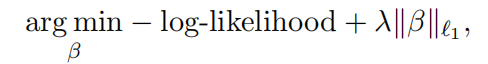 called the LASSO-logistic. A patient is said in stable condition if the Y variable is smaller than 150. Fit
the LASSO-logistic on the training dataset and apply 10 -fold cross validation. Plot the CV error versus the
values of lambda. What is the best lambda value according to CV error? Report the best model, how many
variables are included in the model, what are they?

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV


y_train_val = diabetes_train.iloc[:, 0].values

In [175]:
y_class=[]
for i in range(len(y_train_val)):
    if y_train_val[i]<150:
        y_class.append(0)
    else:
        y_class.append(1)

<function matplotlib.pyplot.show(close=None, block=None)>

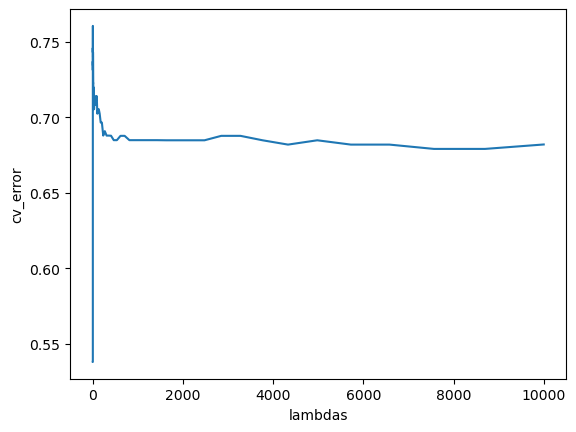

In [177]:
model = LogisticRegressionCV(penalty='l1',solver='liblinear',cv=10,Cs=list(lambda_grid))
model.fit(X_train,y_class)
cv_error = np.mean(model.scores_[1],axis=0)
lambdas=model.Cs_
plt.plot(lambdas,cv_error)
plt.xlabel('lambdas')
plt.ylabel('cv_error')
plt.show


In [199]:
best_lambda5=lambdas[np.argmin(cv_error)]
best_model = LogisticRegression(penalty='l1',solver='liblinear',C=best_lambda5)
best_model.fit(X_train,y_class)

variables=np.sum(best_model.coef_ !=0)
variable_name = [f"Variable {i+1}" for i in range(len(best_model.coef_[0])) if best_model.coef_[0][i]!=0]
print("Number of variables",variables)
print("Variables",variable_name)
                                

Number of variables 2
Variables ['Variable 9', 'Variable 19']
